# Chapter 5. Support Vector Machines

SVM is a powerful and versetile ML model that is capable of performing Classification, Regression, & even outlier detection. 

SVMs are particularly suited for complex small-to-medium sized datasets. This chapter will explain the core concepts of SVMs, how they work, and how to use them.

## Linear SVM Classification

The fundamental idea behind SVMs is better explained with the following picture:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/SVM_example.png" /></div>

We can see that the two classes can be separated easily by a straight line (linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. The dashed line model is so bad that it doesn't even separate the two groups linearly. The other two models work perfectly on the plotted training set but their boundaries are so close to the training data points that they'll probably not perform well on unseen data.

In constrast, the model on the right not only separate the training data linearly, it also stays as far as possible from both classes data points. Thus, it will likely perform well on unseen data.

We can think of an SVM as fitting the widest possible street (represented by the dashed lines) between the classes. This is called **Large Margin Classification**.

We should notice that adding more training points off the street **won't effect the decision boundary at all**. It's fully determined by the data points located at the edge of the street. These instances are called **support vectors**.

SVMs are also sensitive to feature scales.

### Soft Margin Classification

If we restrict all training instances to be off the SVM street, this is called Hard Margin Classification, Hard Margin Classification is greatly effected by the presence of outliers. The following are two example of how outliers can mess-up hard margin classifiers:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/Hard_Margin_Classifier.png" /></div>

To fix the issue, we try to balance finding a wide street with limiting the number of violations. This is called **Soft Margin Classification**.

This can be controlled in scikit-learn by the `C` hyper-parameter:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/Soft_to_Hard_Street.png" /></div>

By increasing `C`, We're increasing the sensitivity of the model to minimize margin violations within the training set. Meaning, If we're overfitting, we try to reduce the value of the `C` hyper-parameter.

Let's use scikit-learn's SVMs:

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
iris['data'].shape

(150, 4)

In [4]:
X = iris['data'][:, [2,3]]  # Petal Length, Petal Width
y = (iris['target'] == 2).astype(np.float64)  # Iris Virginica
X.shape, y.shape

((150, 2), (150,))

In [5]:
svm_clf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [6]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
 svm_clf.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression Models (with their sigmoid functions), SVMs do not output probabilities for each class.

## NonLinear SVM Classification

Many datasets are not even close to being lienarly separable. One approach to handling non-linear modeling is to add more features, such as polynomial features. In some cases this can result in linearly separable datasets.

The following is an example of an original non-linearly separable dataset with only one feature $x_{1}$ (on the left), and an augmented linearly seprable dataset with an added feature $x_{2}=x_{1}^{2}$: 

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/nonlinear_to_linear.png" /></div>

Let's implement this idea using scikit-learn:

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [9]:
X, y = make_moons(n_samples=100, noise=0.15)

In [10]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [11]:
polynomial_svm_clf.fit(X, y)

/Users/mohamedakramzaytar/opt/miniconda3/envs/research/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [12]:
polynomial_svm_clf.score(X, y)

1.0

The following represents the decision boundaries of the model, because we added polynomial degrees, projected boundaries are now non-linear:

<div style="text-align:center;"><img style="width:50%;" src="static/imgs/polynomial_svms.png" /></div>

### Polynomial Kernels

At a low polynomial degrees, adding features cannot deal with complex datasets, and for high polynomial degrees, we endup adding a lot of features, resulting in a very complex & slow model.

Fortunately, when using SVMs we can apply an almost miraculous mathematical technique called the **kernel trick**. The kernel trick makes it possible to have the same result as if we added many polynomial features without actually adding them.

Let's test it on the moon dataset:

In [13]:
from sklearn.svm import SVC

In [14]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [15]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

This model trains an SVM classifier using a kernel of third degree features.

If our model is overfitting, we might want to decrease the polynomial degree, and If it's underfitting, it might be a good idea to increase the degree. `coef0` controls how much the model is influenced by high-degree polynomials vs. low degree polynomials.

The following figure shows the previously trained model (on the left) vs. a more complex model of kernel degree 10:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/kernel_trick.png" /></div>

### Similarity Features

Another technique to tackle non-linear problems is to add features computed using a **similarity function**, which measures how much each instance resembles a particular landmark.

For example, let's take the 1D dataset discussed earlier & add two landmarks to it at $x_{1}=-2$ and $x_{1}=1$, as showcased in the left plot of:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/similarity_measures.png" /></div>

We defined the similarity function to be the **Gaussian Radial Basis Function (RBF)** with $\gamma = 0.3$. $\phi$ is a bell shaped function varying from 0 ($x$ is very far from $l$) to 1 ($x=l$). After defining a similarity function, the new features are the **distances** of each training instance from the landmarks.

As we can see from the plot on the right, the instances become lienarly separable using only distance features.

But how do we select the landmarks? The simplest approach is to create a landmark at each and every point of the training data. Doing that will increase the number of dimensions and will yield a better chance of finding a linear separator. The downside is that we will create additional `m` number of features (as rows), which may lead in performance issues.

### Gaussian RBF Kernel

Just like the polynomial features method, the similarity features method can be useful in many ML algorithms, the problem is that with very large datasets, we'll endup with a very big feature space, but once again we have the Kernel trick to make it look as if we added the additional features.

Let's do it with `sklearn`:

In [16]:
from sklearn.svm import SVC

In [17]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

In [18]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Let's take a look at the predictions space with the training set instances (bottom left is the trained model above), others correspond to different hyper-parameter configurations:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/training_rbfs.png" /></div>

Increasing $\gamma$ makes the bell-shaped curve narrower, the decision boundary ends up being more irregular, wiggling around individual instances. So $\gamma$ acts as a regularization hyper-parameter.
- Increasing gamma increases model sensitivity (may lead to overfitting).
- decreasing gamma increases model bias (may lead to underfitting)

We should always try the linear kernel first, if the training set is not too large, we should also try the gaussian RBF kernel.

### Computational Complexity

`LinearSVC` doesn't support the kernel trick and scales with time complexity of $\mathcal{O}(m \times n)$. Its algorithm takes longer if we ask for higher precision, precision is controlled by the tollerance hyper-parameter $\epsilon$.

`SVC` is based on `libsvm` that supports the kernel trick with complexity between $\mathcal{O}(m^{2} \times n)$ & $\mathcal{O}(m^{3} \times n)$. This means that it gets dreadfuly slow when the training instances count gets big. This algorithm is good for small to medium sized datasets and scales well with the number of features.

## SVM Regression

SVMs also support linear and nonlinear regression, but to move from classification to regression we have to reverse the objective. Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit **as many instance as possible** on the street while limiting margin violations. The width of the street is controlled by the hyper-parameter $\epsilon$, following is an example:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/SVM_regression.png" /></div>

Adding more instances into the margin doesn't effect the model's predictions; thus the model is said to be $\epsilon$-insensitive.

Let's implement it using `sklearn`'s `SVR` (after scaling & centering the data):

In [19]:
from sklearn.svm import LinearSVR

In [20]:
svm_reg = LinearSVR(epsilon=1.5)

In [21]:
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

To tackle linear regression tasks, we can use a kernelized SVM model.

Let's do it using the polynomial kernel:

In [22]:
from sklearn.svm import SVR

In [23]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')

In [24]:
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

`LinearSVR` scales linearly with the size of the training set, while `SVR` is much slower (just like `LinearSVC` & `SVC`).

## Under the Hood

This section explains how `SVMs` make predictions and how their training algorithms work, starting with Linear SVM classifiers.

### Decision Function & Predictions

The linear SVM classifier model predicts the class of a new instance by simply computing $w^{T}x+b = w_1x_1+w_2x_2+\dots+w_nx_n+b$, If it's positive, then $x$ is labeled $1$, otherwise $x$ is labeled $0$:

$$\hat{y}=\begin{cases}
1,  & \text{if $w^{T}x+b \ge 0$} \\
0, & \text{if $w^{T}x+b < 0$}
\end{cases}$$

The following showcases the training data points and the activation $w^{T}x+b$:

<div style="text-align:center;"><img style="width:66%;" src="static/imgs/SVM_space.png" /></div>

Training an SVM Classifier is finding a $(w,b)$ that makes the margin as wide as possible while avoiding margin violations (hard margin) or limiting them (soft margin).

### Training Objective

We know that the slope of the decision function is $||w||$. Dividing $||w||$ by $2$ will multiply the margin by $2$. So we want to minimize $||w||$ to get a large margin. 

If we also want to avoid any margin violations then:
- We want the decision function to be greater than 1 for all positive training instances.
- And lower than -1 for all negative training instances.

If we define $t^{(i)}=-1$ for negative instances (if $y^{(i)}=0$) and $t^{(i)}=1$ for positive instances (if $y^{(i)}=1$). Then we can express this constraint as $t^{(i)}(w^{T}x^{(i)}+b)\ge 1$. 

We can therefore express the hard margin linear SVM classifier objective as the following constrained optimization problem:

$$\begin{array}{ll}
\text{minimize}_{(w,b)}  & \frac{1}{2}w^{T}w \\
\text{subject to}& t^{(i)}(w^{T}x^{(i)} + b) \ge 1; \forall i \in \{1,2,\dots,m\}
\end{array}$$

To get the soft margin objective, we need to introduce a slack variable $\zeta^{(i)} \ge 0$ for each instance. $\zeta^{(i)}$ measures how much the i-th instance is allowed to violate the margin.

We now have two conflicting objectives, Make the slack variables as small as possible to reduce the margin violations, and make $\frac{1}{2}w^{T}w$ as small as possible to increase the margin. 

This is where the $C$ hyper-parameter comes in: It allows to define the tradeoff between these two objectives. This gives us the following contrained optimization problem for Softmargin Linear SVM Classifier Objective:
    
$$\begin{array}{ll}
\text{minimize}_{(w,b,\zeta)}  & \frac{1}{2}w^{T}w + C\sum_{i=1}^{m}\zeta^{(i)} \\
\text{subject to}& t^{(i)}(w^{T}x^{(i)} + b) \ge 1 - \zeta^{(i)}; \zeta^{(i)} \ge 0 \; \forall i \in \{1,2,\dots,m\}
\end{array}$$

### Quadratic Programming

The hard/soft margin problems are both quadratic optimization problems with linear constraints. Such problems are known as *Quadratic Programming* (QP) problems.

One way to train a hard margin linear SVM classifier is to use an off-the-shelf QP Solver and pass it our parameters. We can also use a Quadratic Solver to train for the soft margin linear SVM classifier.

To use the kernel trick though, we're going to take a look at a different optimization problem:

### The Dual Problem

Given a constrained optimization problem (Primal problem) it is possible to express a different but closely related problem (dual problem).

The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it may have the same solution as the primal problem. Luckily, the SVM problem happens to meet these conditions.

Here is the dual problem formulation for the SVM Linear classification optimization problem:

$$\begin{array}{ll}
\text{minimize}_{(\alpha)}  & \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}{x^{(i)}}^{T}x^{(j)} - \sum_{i=1}^{m}\alpha^{(i)} \\
\text{subject to}& \alpha^{(i)} \ge 0; \forall i \in \{1,2,\dots,m\}
\end{array}$$

Once we find the solution $\hat{\alpha}$ to the previous problem, we use the following to calculate its corresponding $\hat{w}$ abd $\hat{b}$:

$$\hat{w}=\sum_{i=1}^{m}\hat{w}^{(i)}t^{(i)}x^{(i)} \\ \hat{b} = \frac{1}{n_s} \sum_{i=1}^{m}(t^{(i)} - \hat{w}^{T}x^{(i)})$$

The dual problem is faster to solve when the number of instances is less then the number of features. More importantly, the dual problem makes the kernel trick possible while the primal problem does not, so what is the kernel trick anyway?

### Kernelized SVMs

If we apply the transformation $\phi$ to all training instances, then the dual problem will contain the dot product $\phi(x^{(i)})^{T}\phi(x^{(j)})$. But if $\phi$ is the second degree polynomial transformation then we can replace $\phi(x^{(i)})^{T}\phi(x^{(j)})$ with $({x^{(i)}}^{T}x^{(j)})^{2}$. Meaning, **We don't need to transform the instances at all** (this trick makes for a much simpler computation).

The function $K(a,b)=(a^{T}b)^{2}$ is a 2nd degree polynomial kernel. In ML, a kernel is a function capable of computing $\phi(a)^{T}\phi(b)$ based only on the original vectors $a$ and $b$ without having to compute the original transformation $\phi$

In the case of the gaussian RBF kernel: $K(a,b)=exp(-\gamma||a-b||^{2})$, It can be shown that $\phi$ maps each instance to an infinite dimensional space, so it's a good thing we don't actually need to perform the mapping.

### Online SVMs

We should remember that online learning means learning incrementally, as new instances arrive. For linear SVMs classifiers, one way to implement online learning is through gradient descent to minimize the cost function derived from the primal objective. Unfortunately, GD converges much slower than the QP methods.

For large-scale non-linear problems, we may want to consider using neural networks instead.

---

# **Exercices**

**1. What is the Fundamental Idea Behind Support Vector Machines**

For classification, The premise of SVMs is finding decision boundaries that maximize relative distance between them and points and minimize the number of violations in the supporting street.

For regression, the opposite is true, SVMs optimize for a street the is as close as possible to the training instances, violations in this case represent the data points that are "outside" of the street.

**2. What is a Support Vector**

A Support vector represents the training instance that is used to create a boundary of the street, hence it's considered a "support" for it. Any instance that is not a support vector has no influence whatsoever on the decision boundary.

**3. Why is It Important to Scale the Input when using SVMs**

A proparly scaled feature space will create empty space for the SVM model to be optimized to split it. If the feature space is not scaled, the algorithm will tend to ignore features with small scales.

**4. Can an SVM classifier output a confidence score when it classifies an instance? How about a probability?**

SVM model can output confidence scores based on the distance from the instance to the decision boundary. However, SVMs can't really output a probability score.

Note: we could estimate probability scores using `sklearn`'s hyper-parameters.

**5. Should You Use the Primal or the Dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?**

It's better to use the Primal form of the SVM problem because the Dual form is only faster when the number of features is more than the number of instances.

**6. Say you've trained an SVM classifier with the RBF Kernel, but it seems to underfit the training data, should you increase or decrease $\gamma$? How about $C$?**

Increasing $\gamma$ and $C$ is good because it will increase model sensitivity.

**7. How you should set the QP parameters ($H$, $f$, $A$, and $b$) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?**

The general formulation of a quadratic programming problem is as follows:

$$\begin{array}{ll}
\text{minimize}_{p} & \frac{1}{2}p^THp + f^Tp \\
\text{subject to} & Ap \le b
\end{array}$$

Where:

$$\begin{cases}
p \in \Bbb{R}^{n_p \times 1} \qquad n_p: parameter \space count \\
H \in \Bbb{R}^{n_p \times n_p} \\
f \in \Bbb{R}^{n_p \times 1} \\
A \in \Bbb{R}^{n_c \times n_p} \qquad n_c: constraints \space count \\
\end{cases}$$

Let's consider $H'$, $f'$, $A'$ and $b'$. The parameters for the soft margin SVM problem form are:

$$f=[f' \underbrace{C\cdots C}_{m\text{ times}}] \\ b=[b' \quad \underbrace{0\cdots 0}_{m\text{ times}}] \\ p=[\underbrace{w}_{n+1 \text{ times}} \quad \underbrace{\zeta}_{m \text{ times}}] \\ A=\begin{pmatrix} A' & I_m \\ 0 & -I_m \end{pmatrix} \\ H=\begin{pmatrix} H' & 0 \\ 0 & 0 \end{pmatrix} $$

**8. Train a `LinearSVC` on a Linearly Separable Dataset. Then train an `SVC` & a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model**

In [25]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

Let's first generate linearly separable data:

In [26]:
d1 = np.concatenate((np.random.normal(loc=6, scale=1, size=(500, 2)), np.ones((500, 1))), axis=1) 
d2 = np.concatenate((np.random.normal(loc=3, scale=1, size=(500, 2)), np.zeros((500, 1))), axis=1) 
d1.shape, d2.shape

((500, 3), (500, 3))

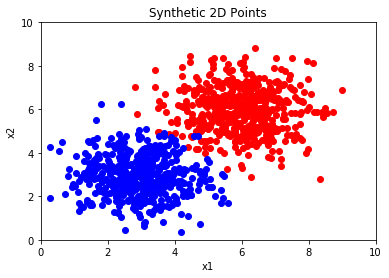

In [27]:
plt.scatter(d1[:,0], d1[:,1], c='red')
plt.scatter(d2[:,0], d2[:,1], c='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Next, we combine and shuffle the data:

In [28]:
d = np.concatenate((d1,d2), axis=0)
d.shape

(1000, 3)

In [29]:
np.random.shuffle(d)

Time for training:

In [30]:
model = LinearSVC()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test =  train_test_split(d[:,:2], d[:,2:], test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 1), (200, 1))

In [34]:
model.fit(X_train, y_train.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [35]:
model.score(X_test, y_test)

1.0

Let's plot its decision boundary:

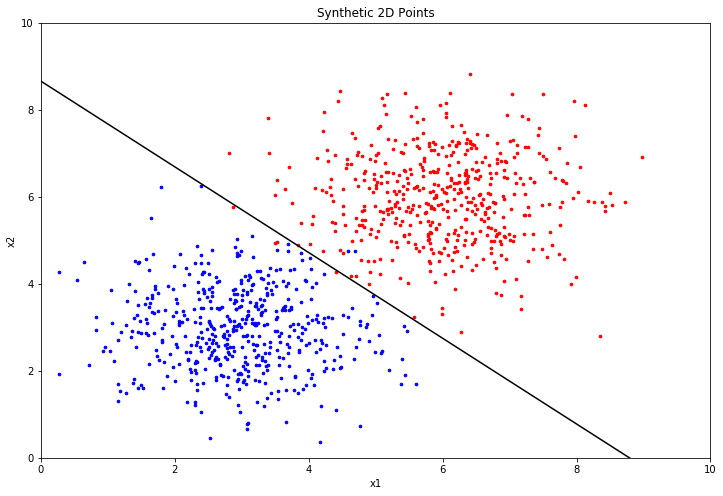

In [36]:
plt.figure(figsize=(12,8))
# Points
plt.scatter(d1[:,0], d1[:,1], c='red', s=7)
plt.scatter(d2[:,0], d2[:,1], c='blue', s=7)
# Decision boundaries
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
# Other
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Next, let's try `SVC` & contrain it to approximate the linear classifier:

In [37]:
C = 99.
svc_clf = SVC(C=C, kernel='linear', degree=1, gamma='auto')

In [38]:
svc_clf.fit(X_train, y_train.ravel())

SVC(C=99.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svc_clf.score(X_test, y_test)

1.0

In [40]:
h = .02 
x_min, x_max = d[:,0].min() - 1, d[:,0].max() + 1
y_min, y_max = d[:,1].min() - 1, d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [41]:
Z = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

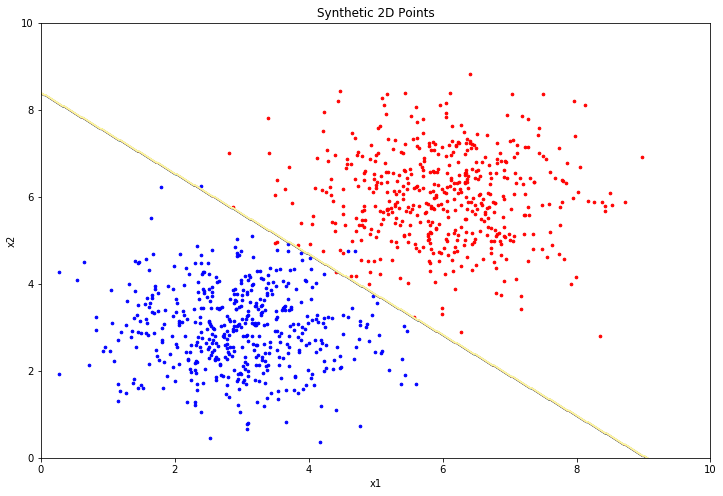

In [42]:
plt.figure(figsize=(12,8))
# Points
plt.scatter(d1[:,0], d1[:,1], c='red', s=7)
plt.scatter(d2[:,0], d2[:,1], c='blue', s=7)
# Decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
# Other
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

To have a similar classifier, we needed to specify the kernel parameter as `linear` and the degree parameter as $1$.

Finally, let's try to do the same to `SGDClassifier`:

In [43]:
sgd_clf = SGDClassifier()

In [44]:
sgd_clf.fit(X_train, y_train.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
sgd_clf.score(X_test, y_test)

1.0

In [46]:
h = .02 
x_min, x_max = d[:,0].min() - 1, d[:,0].max() + 1
y_min, y_max = d[:,1].min() - 1, d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [47]:
Z = sgd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

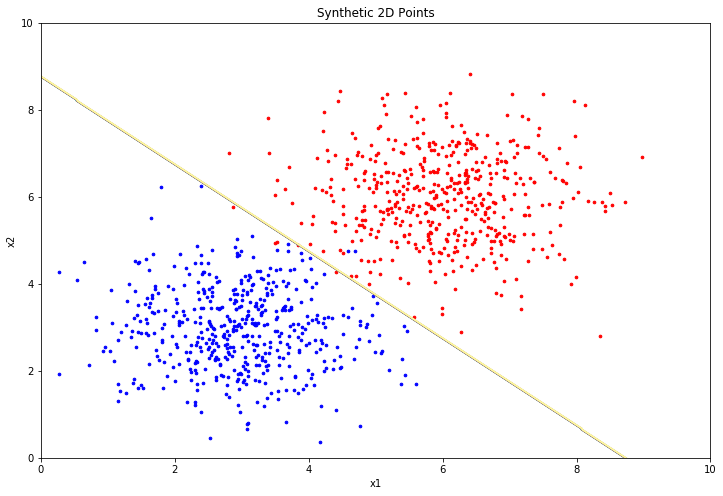

In [48]:
plt.figure(figsize=(12,8))
# Points
plt.scatter(d1[:,0], d1[:,1], c='red', s=7)
plt.scatter(d2[:,0], d2[:,1], c='blue', s=7)
# Decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
# Other
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

`SGDClassifier`s are just regular **linear** classifiers trained using Stochastic Gradient Descent, so we get what we want without regularization.

**9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-rest to classify all 10 digits. You may want to tune the hyper-parameters using small validation sets to speed up the process. What accuracy can you reach?**

In [49]:
from sklearn import datasets

In [50]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

We will use cross-validation to optimize hyper-parameters:

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [64]:
clf = OneVsRestClassifier(estimator=SVC(gamma='auto'))

In [67]:
scores = cross_val_score(estimator=clf, X=X_train[:1000]/255., y=y_train[:1000], cv=7)

In [68]:
print(f"We reach an accuracy of {sum(scores)/len(scores)}")

We reach an accuracy of 0.7790821178640356


**10. Train an SVM Regressor on the California Housing Dataset**

In [69]:
from sklearn.svm import SVR

In [72]:
X, y = datasets.california_housing.fetch_california_housing(return_X_y=True)
X.shape, y.shape

((20640, 8), (20640,))

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [80]:
from sklearn.preprocessing import StandardScaler

First we scale:

In [81]:
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [84]:
regressor = SVR()

In [85]:
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
regressor.score(scaler.transform(X_val), y_val)

0.7225873526604307

---